In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.shape

(10000, 11)

In [6]:
df.dtypes.value_counts()

int64      7
object     2
float64    2
dtype: int64

In [7]:
df.isna().sum()  #No nan values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Target Variable: Exited

In [9]:
df['Exited'].value_counts(normalize=True) #Unbalanced data

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [10]:
print('Unique values for each column')
for col in df.columns:
    print(f'{col :<20}', df[col].nunique())

Unique values for each column
CreditScore          460
Geography            3
Gender               2
Age                  70
Tenure               11
Balance              6382
NumOfProducts        4
HasCrCard            2
IsActiveMember       2
EstimatedSalary      9999
Exited               2


In [11]:
continuous_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

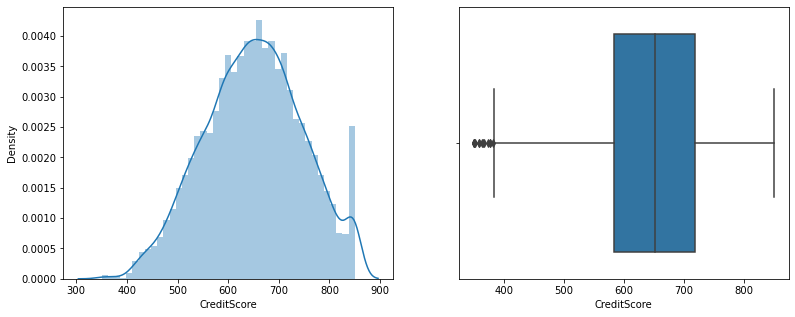

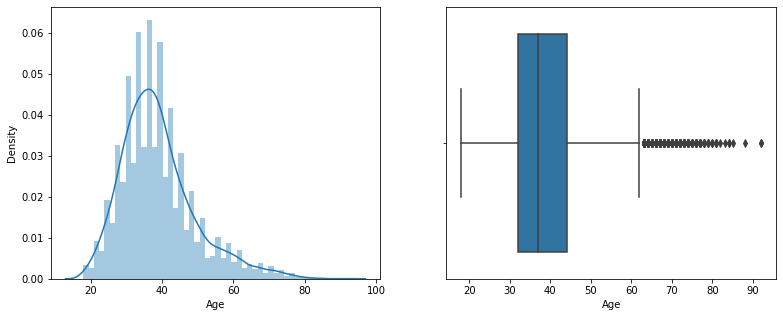

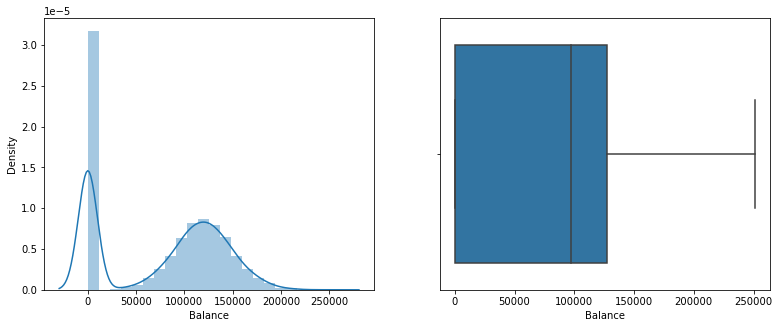

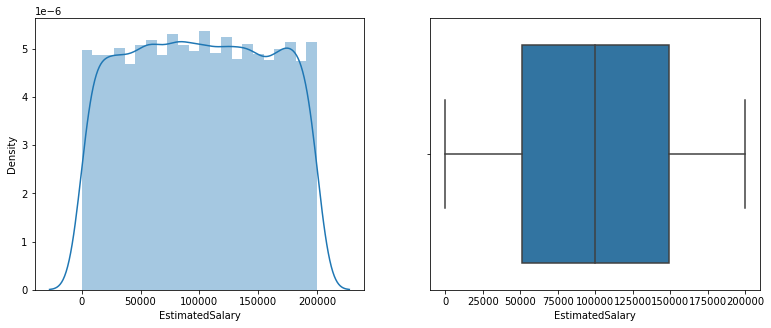

In [12]:
for col in continuous_features:
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.subplot(122)
    sns.boxplot(x=col, data=df)

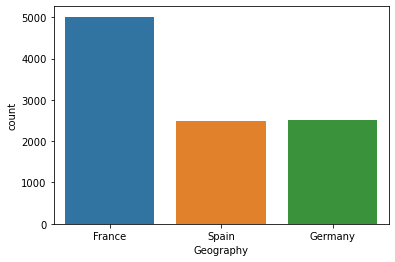

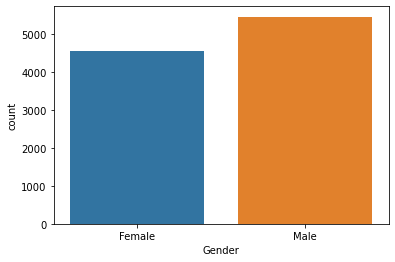

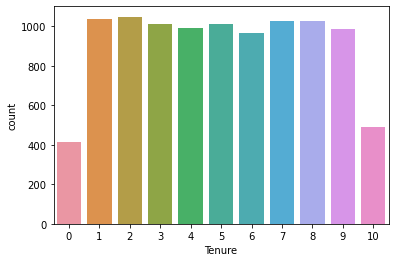

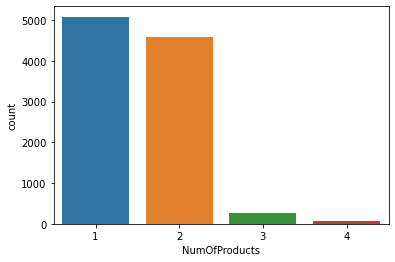

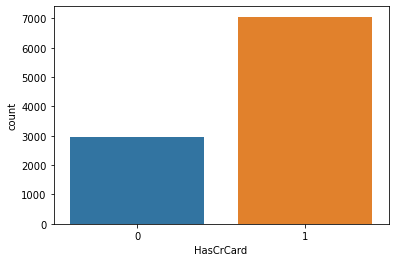

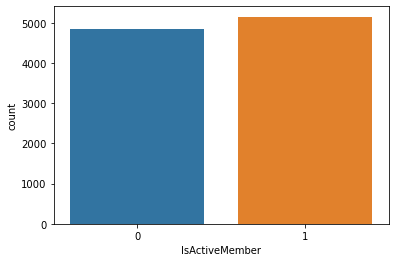

In [14]:
for col in categorical_features:
    plt.figure()
    sns.countplot(df[col])

#### <font color='purple'> Some features has almost balanced categories like gender and isActiveMember while others not like geography and numOfProducts </font>

# Analyzing features with target

In [15]:
df_neg = df[df['Exited']==0]
df_pos = df[df['Exited']==1]

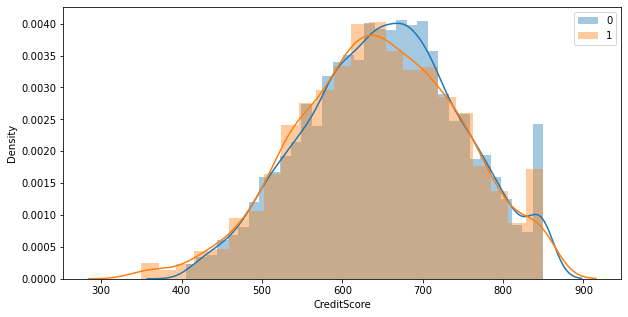

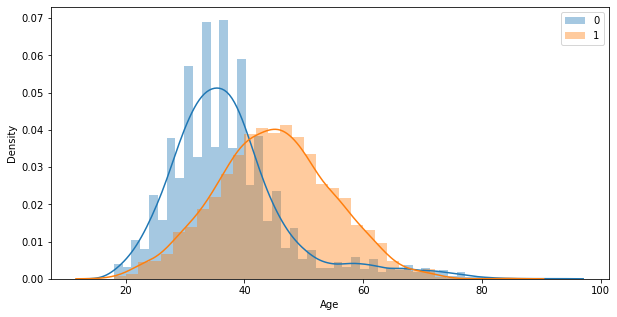

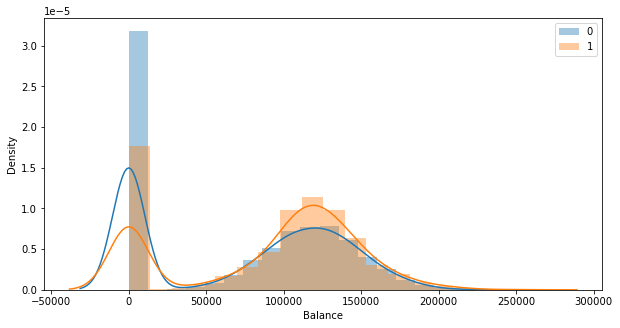

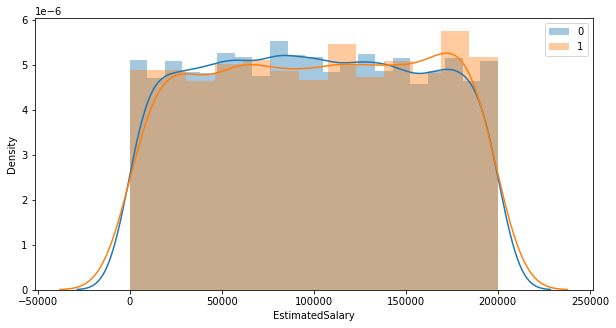

In [16]:
for col in continuous_features:
    plt.figure(figsize=(10,5))
    sns.distplot(df_neg[col], label='0')
    sns.distplot(df_pos[col], label='1')
    plt.legend();

#### <font color='purple'> It seems that the age has an important impact for the prediction </font>

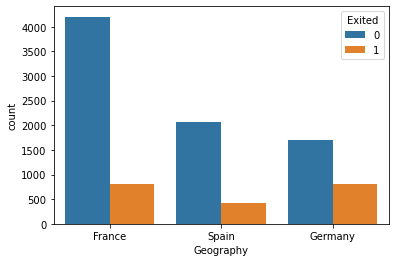

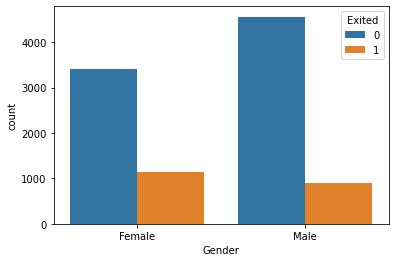

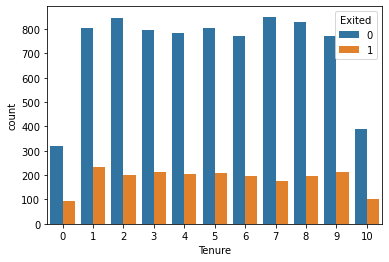

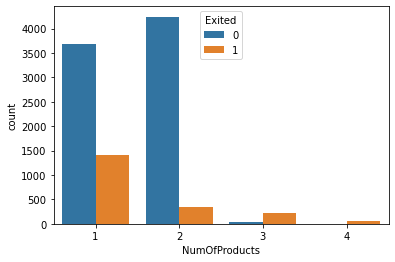

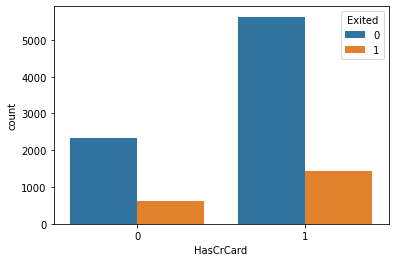

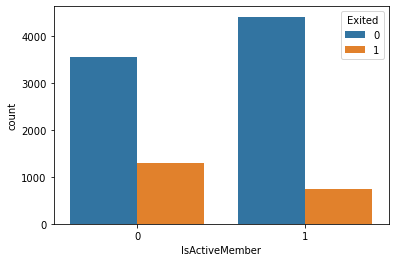

In [17]:
for col in categorical_features:
    plt.figure()
    sns.countplot(df[col], hue=df['Exited'])

In [18]:
def crosstab(col):
    tab = pd.crosstab(df['Exited'], df[col], margins=True)
    tab_1 = tab.div(tab['All'], axis=0)
    tab_2 = tab/tab.iloc[2]
    return tab_1, tab_2

### Gender 

In [19]:
tab1, tab2 = crosstab('Gender')
tab1

Gender,Female,Male,All
Exited,,,
0,0.427477,0.572523,1.0
1,0.559156,0.440844,1.0
All,0.454300,0.545700,1.0


#### <font color='purple'> Among all churned customers, 56% were female, and 44% were male. Additionally, 42% of females did not churn among all non-churned customers. </font>

In [25]:
tab2

Gender,Female,Male,All
Exited,,,
0,0.749285,0.835441,0.7963
1,0.250715,0.164559,0.2037
All,1.000000,1.000000,1.0000


#### <font color='purple'> Among all females, 25% were churners, and 75% were not, while 16% of males belonged to the churner category. </font>

### Geography 

In [21]:
tab1, tab2 = crosstab('Geography')
tab1

Geography,France,Germany,Spain,All
Exited,,,,
0,0.527942,0.212859,0.259199,1.0
1,0.397644,0.399607,0.202749,1.0
All,0.501400,0.250900,0.247700,1.0


In [22]:
tab2

Geography,France,Germany,Spain,All
Exited,,,,
0,0.838452,0.675568,0.833266,0.7963
1,0.161548,0.324432,0.166734,0.2037
All,1.000000,1.000000,1.000000,1.0000


### IsActiveMember

In [23]:
tab1, tab2 = crosstab('IsActiveMember')
tab1

IsActiveMember,0,1,All
Exited,,,
0,0.445435,0.554565,1.0
1,0.639175,0.360825,1.0
All,0.484900,0.515100,1.0


#### <font color='purple'> Among all non-churners, 55% are active members, while 45% are not. For churners, 36% were active members, and 64% were not.</font>


In [24]:
tab2

IsActiveMember,0,1,All
Exited,,,
0,0.731491,0.857309,0.7963
1,0.268509,0.142691,0.2037
All,1.000000,1.000000,1.0000


#### <font color='purple'> Among all non-active members, 73% were churners, while 27% were not. For active members, 86% were churners, and 14% were not.</font>

 # Advanced analyse

## Numerical Vs Numerical (pairplot, lmplot, heatmap, scatterplot)

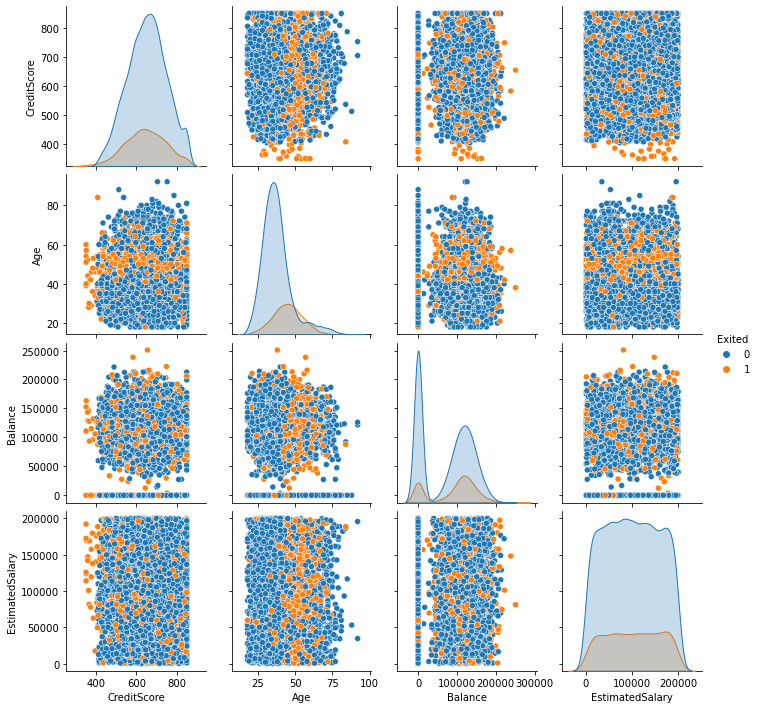

In [26]:
sns.pairplot(pd.concat([df[continuous_features], df['Exited']],axis=1), hue='Exited')  #No correlation btw numerical features
#Let's make sure by calculating correlation btw features

<AxesSubplot:>

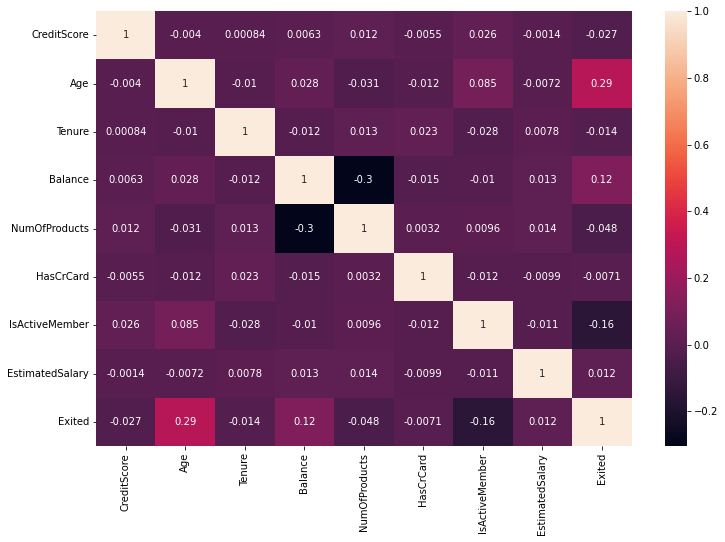

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True) 

## Numerical Vs Categorical (catplot, stripplot, boxplot)

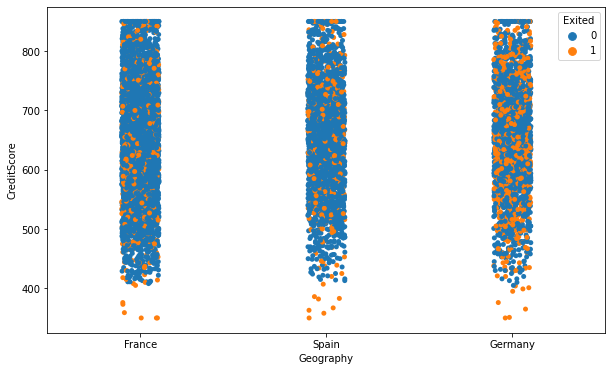

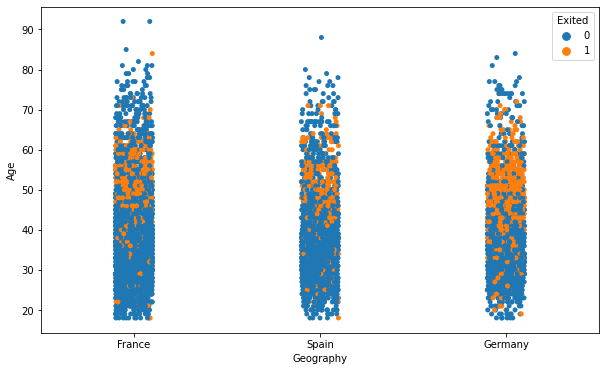

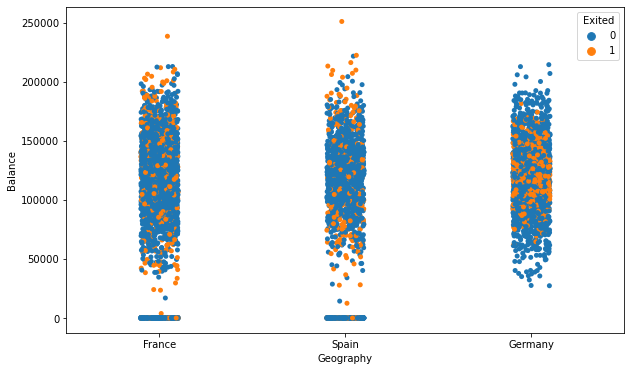

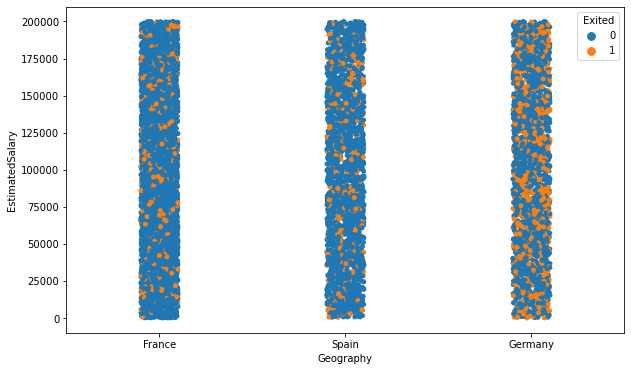

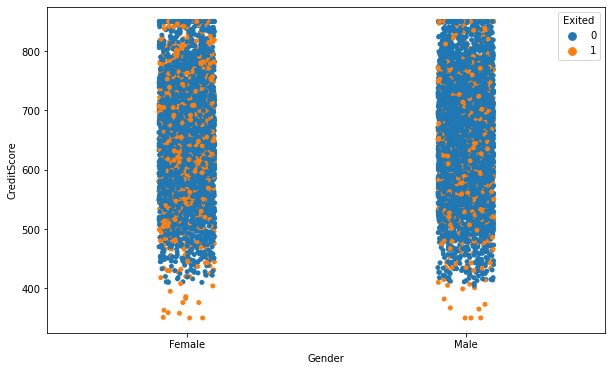

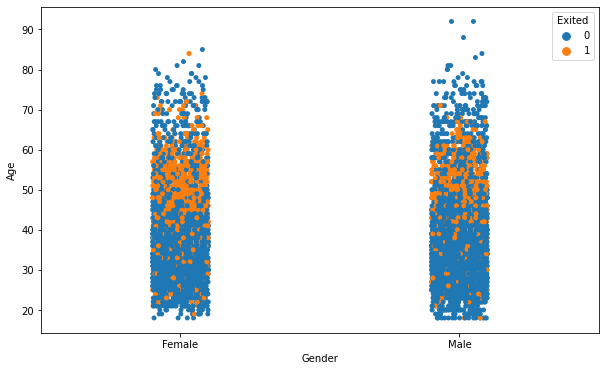

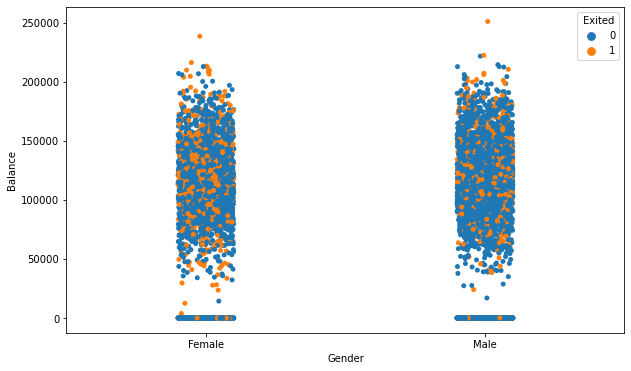

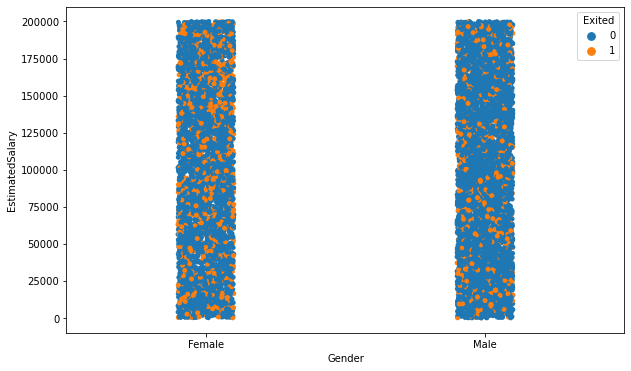

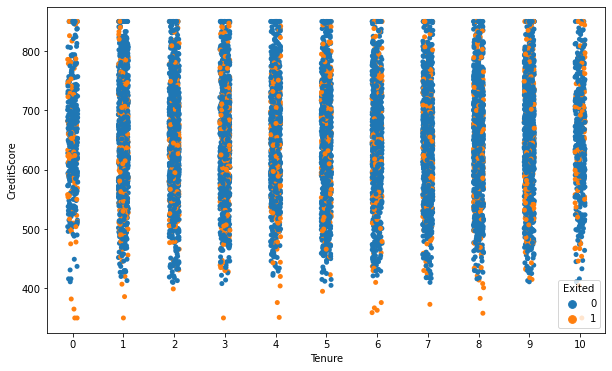

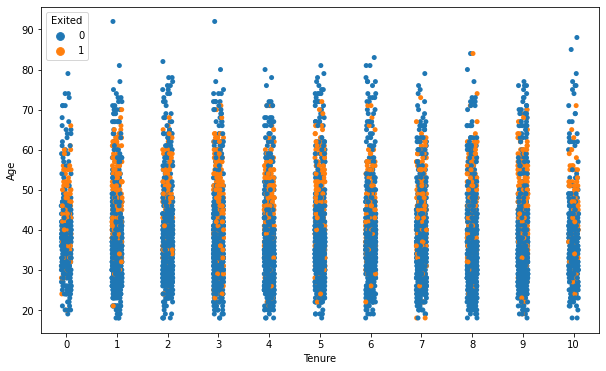

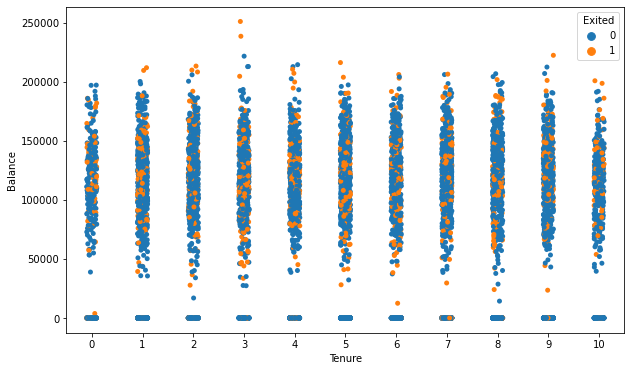

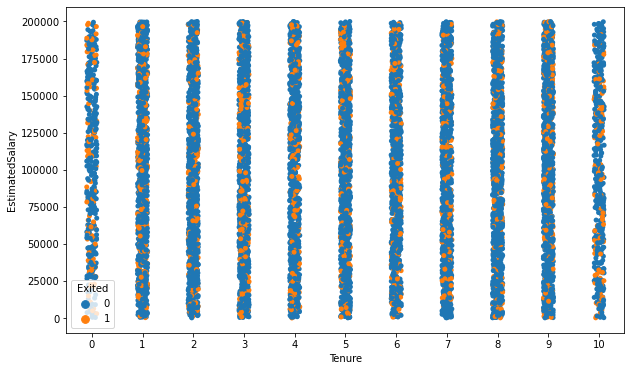

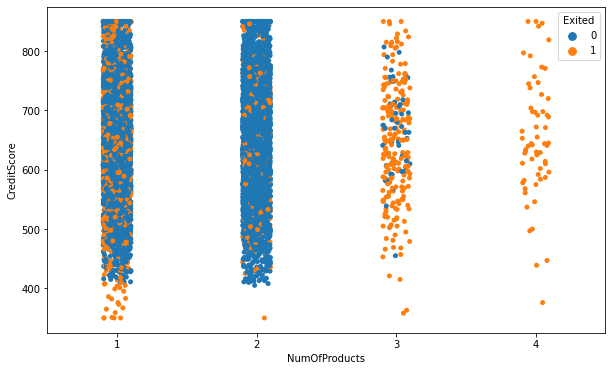

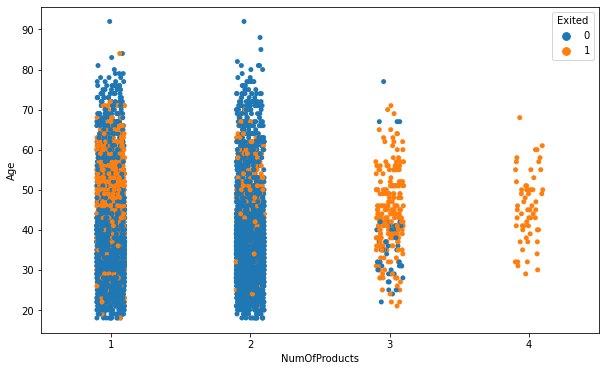

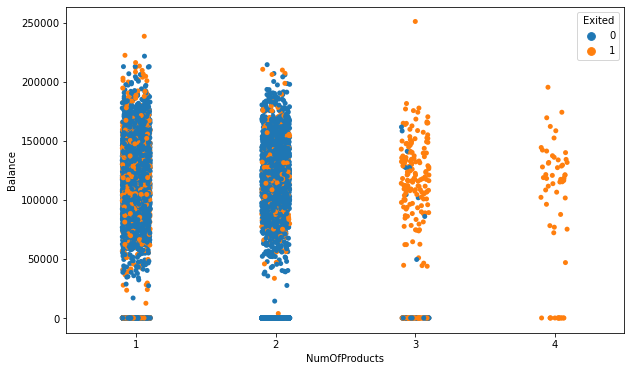

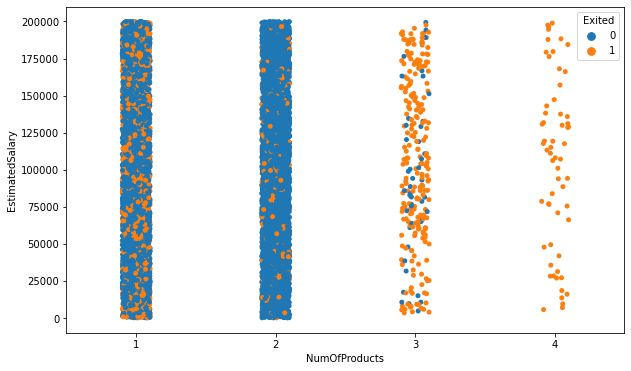

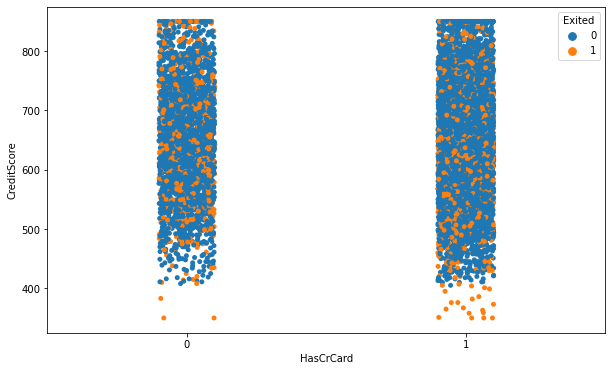

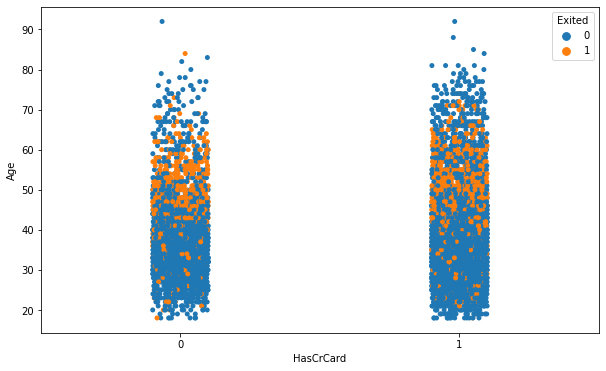

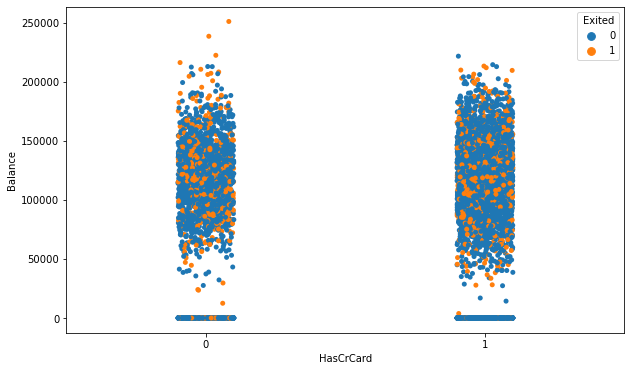

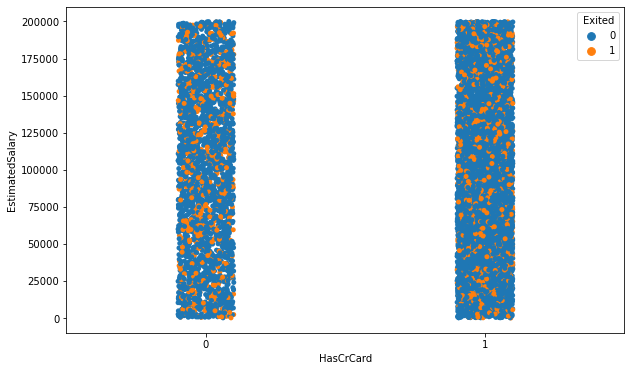

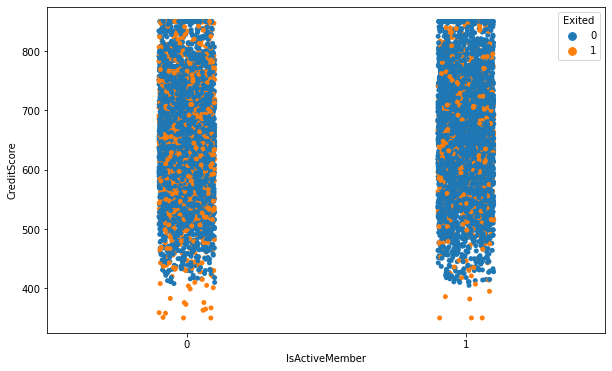

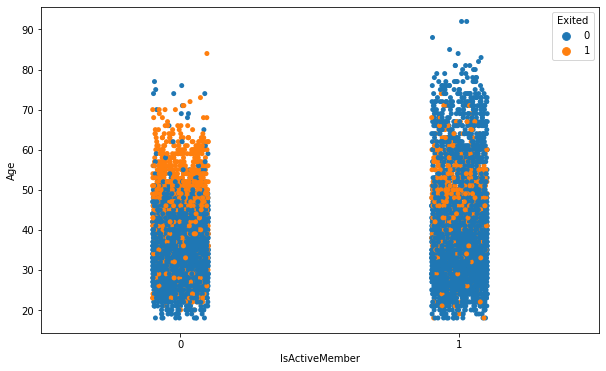

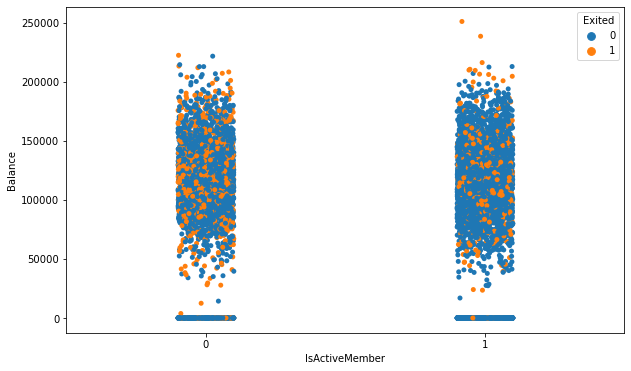

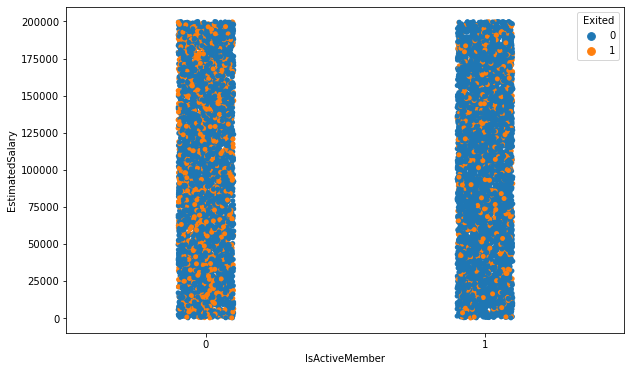

In [28]:
for cat_col in categorical_features:
    for num_col in continuous_features:
        plt.figure(figsize=(10,6))
        sns.stripplot(data=df, x=cat_col, y=num_col, hue="Exited");

<font color='purple'> 
I find the strip plot to be very useful as it provides two types of information:

- It showcases the percentage of the positive class within each category.
- It illustrates the distribution of the positive class along with the numerical feature.
As evident from the Geography-CreditScore graph, the state of Germany exhibits a higher number of churners compared to other states. Additionally, it appears that the CreditScore does not significantly impact the target variable for values greater than 400. </font>

## Categorical Vs Categorical (countplot, crosstab, heatmap)

<AxesSubplot:xlabel='Geography', ylabel='Gender'>

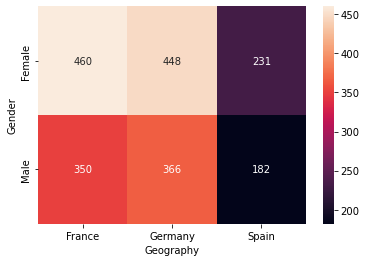

In [36]:
#sns.countplot(x='Gender', hue='Geography', data=df)
cross_tab = pd.crosstab(df_pos['Gender'], df_pos['Geography'])
sns.heatmap(cross_tab, annot=True, fmt="d")

# Modeling 

In [29]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
print('X_train shape:', x_train.shape)
print('X_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (8000, 10)
X_test shape: (2000, 10)
y_train shape: (8000,)
y_test shape: (2000,)


## Decision Tree

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [35]:
def encoding(X):
    encoder = OrdinalEncoder()
    return encoder.fit_transform(X)    

In [36]:
X_train = encoding(x_train)
X_test = encoding(x_test)

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [128]:
def evaluation(model):
    plt.figure()
    print(sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), cbar=False, annot=True, fmt='d', cmap='gray'))
    print(classification_report(y_test, model.predict(X_test)))

AxesSubplot(0.125,0.125;0.775x0.755)
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1595
           1       0.48      0.49      0.49       405

    accuracy                           0.79      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.79      0.79      0.79      2000



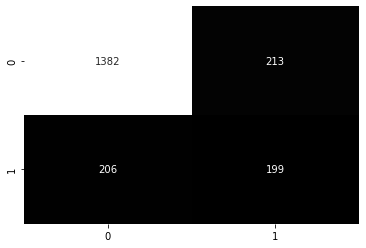

In [129]:
evaluation(dt)

#### <font color='purple'> Since our data is unbalanced, our evaluation metric will be the F1-score. For our first model, we obtained an F1-score of 68%. Let's attempt to tune our model's parameters and assess whether the performance can be improved.</font>

### Hyperparameter Tuning

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : range(1,15),
              'criterion' :['gini', 'entropy'],
            }
grid = GridSearchCV(DecisionTreeClassifier(), cv=5, param_grid=param_grid, scoring='f1')

In [132]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='f1')

In [133]:
grid.best_params_, grid.best_score_

({'ccp_alpha': 0.001,
  'criterion': 'entropy',
  'max_depth': 11,
  'max_features': 'log2'},
 0.5402338550252973)

AxesSubplot(0.125,0.125;0.775x0.755)
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1595
           1       0.68      0.45      0.54       405

    accuracy                           0.85      2000
   macro avg       0.77      0.70      0.73      2000
weighted avg       0.83      0.85      0.83      2000



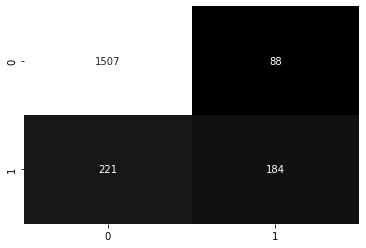

In [134]:
evaluation(grid.best_estimator_)

#### <font color='purple'> Our model's performance increased to 73%. However, this is still insufficient. Let's try feature selection to ensure we are using only relevant features.</font>

### Feature Selection

In [135]:
model = grid.best_estimator_
model.feature_importances_

array([0.01879536, 0.03183848, 0.03917595, 0.40894086, 0.00648831,
       0.05735424, 0.34940237, 0.        , 0.08500503, 0.0029994 ])

In [136]:
X_train[0]

array([2.73e+02, 2.00e+00, 0.00e+00, 1.60e+01, 5.00e+00, 0.00e+00,
       1.00e+00, 1.00e+00, 0.00e+00, 6.54e+03])

<AxesSubplot:>

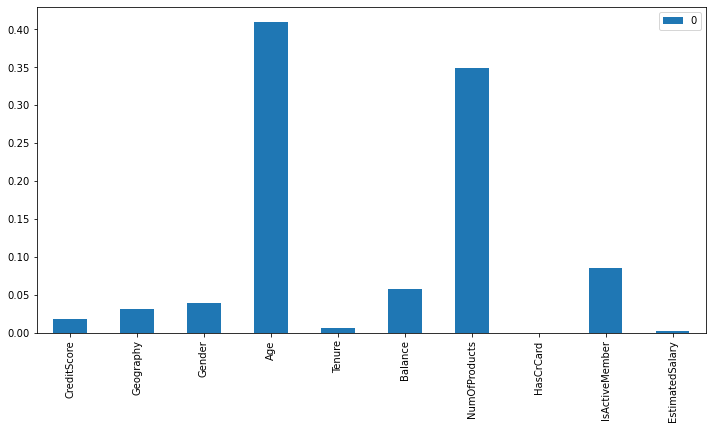

In [137]:
pd.DataFrame(model.feature_importances_, index=x_train.columns).plot.bar(figsize=(12,6))

In [138]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import PolynomialFeatures

In [139]:
pipeline = make_pipeline(PolynomialFeatures(2), SelectKBest(k=15), model)

In [140]:
grid_params = {'selectkbest__k':range(1,20)}
grid = GridSearchCV(pipeline, cv=5, param_grid = grid_params, scoring='f1') 

In [141]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('selectkbest', SelectKBest(k=15)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(ccp_alpha=0.001,
                                                               criterion='entropy',
                                                               max_depth=11,
                                                               max_features='log2'))]),
             param_grid={'selectkbest__k': range(1, 20)}, scoring='f1')

In [142]:
grid.best_params_, grid.best_score_

({'selectkbest__k': 17}, 0.48533692948015156)

AxesSubplot(0.125,0.125;0.775x0.755)
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.74      0.43      0.55       405

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



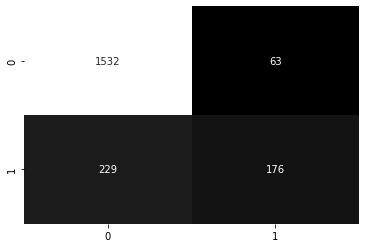

In [143]:
evaluation(grid.best_estimator_)

#### <font color='purple'> As we can observe, the performance of the model decreased to 70%, with a recall of 39%, which is insufficient for our situation given our goal is to minimize the false negative rate.</font>

## Adaboost Classifier

In [158]:
from sklearn.ensemble import AdaBoostClassifier

AxesSubplot(0.125,0.125;0.775x0.755)
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1595
           1       0.71      0.53      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



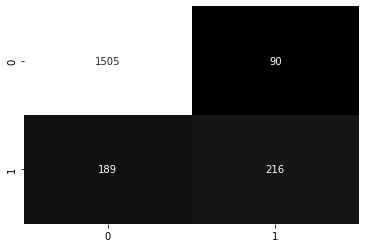

In [149]:
adaboost = AdaBoostClassifier(random_state=0)
adaboost.fit(X_train, y_train)
evaluation(adaboost)

#### <font color='purple'> This represents our best result thus far, achieving an F1-score of 76% and a recall of 54%.</font>

### Hyperparameter Tuning 

In [150]:
param_grid = {'n_estimators': [50, 100, 150, 200],
              'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
              'algorithm': ['SAMME', 'SAMME.R']}
grid = GridSearchCV(AdaBoostClassifier(), cv=5, param_grid=param_grid, scoring='f1')

In [151]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2)],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [152]:
grid.best_params_, grid.best_score_

({'algorithm': 'SAMME',
  'base_estimator': DecisionTreeClassifier(max_depth=1),
  'n_estimators': 150},
 0.5592026833417523)

AxesSubplot(0.125,0.125;0.775x0.755)
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1595
           1       0.73      0.47      0.57       405

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



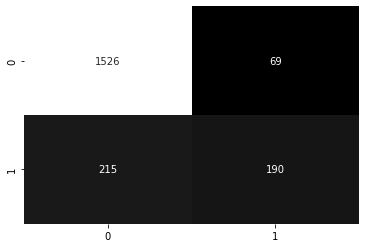

In [153]:
evaluation(grid.best_estimator_)

#### <font color='purple'> We didn't observe any improvements (F1-score: 74%, Recall: 47%).</font>

## Random Forest

AxesSubplot(0.125,0.125;0.775x0.755)
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.47      0.58       405

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



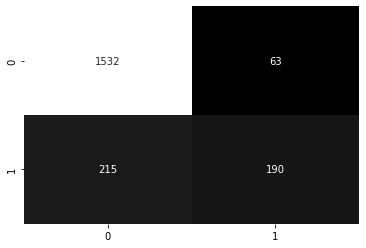

In [154]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
evaluation(rf)

#### <font color='purple'> We obtained nearly identical results with the Adaboost classifier after hyperparameter tuning.</font>

### Hyperparameter Tuning

In [160]:
param_grid = {'n_estimators': [100, 150, 200],
              'max_depth': [None, 10, 20, 30]}
grid = GridSearchCV(RandomForestClassifier(), cv=5, param_grid=param_grid, scoring='f1')

In [161]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='f1')

In [162]:
grid.best_params_, grid.best_score_

({'max_depth': None, 'n_estimators': 200}, 0.5708890978200868)

AxesSubplot(0.125,0.125;0.775x0.755)
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.47      0.58       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



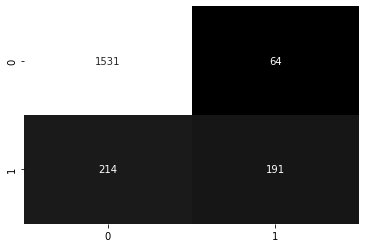

In [163]:
evaluation(grid.best_estimator_)